In [1]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import dslab

%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\GGPC\AppData\Local\conda\conda\envs\term121x_env\python.exe
{'numpy': '1.20.1', 'pandas': '1.1.3', 'seaborn': '0.11.0', 'sklearn': '0.23.2', 'matplotlib': '3.3.1'}


In [2]:
# Import the data sets
house_train = pd.read_csv('train.csv',
                index_col = 0,
                na_values = 'NaN',
                keep_default_na = False)

house_test = pd.read_csv('test.csv',
                  index_col = 0,
                  na_values = 'NaN',
                  keep_default_na = False)

In [3]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   int64 
 1   MSZoning       1459 non-null   object
 2   LotFrontage    1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   Alley          1459 non-null   object
 6   LotShape       1459 non-null   object
 7   LandContour    1459 non-null   object
 8   Utilities      1459 non-null   object
 9   LotConfig      1459 non-null   object
 10  LandSlope      1459 non-null   object
 11  Neighborhood   1459 non-null   object
 12  Condition1     1459 non-null   object
 13  Condition2     1459 non-null   object
 14  BldgType       1459 non-null   object
 15  HouseStyle     1459 non-null   object
 16  OverallQual    1459 non-null   int64 
 17  OverallCond    1459 non-null   int64 
 18  YearBuilt      1459 non-n

# Transformations on the Data
## Split the Data into Categorical and Numeric data

In [4]:
# Define variables which are categorical
categoricalInit = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape","LandContour", "Utilities", 
               "LotConfig", "LandSlope", "Neighborhood","Condition1", "Condition2", "BldgType", "HouseStyle",
               "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd","MasVnrType",
               "ExterQual", "ExterCond", "Foundation", "BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", 
               "BsmtFinType2", "Heating", "HeatingQC","CentralAir", "Electrical", "KitchenQual", "Functional",
               "FireplaceQu","GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", 
               "Fence", "MiscFeature", "SaleType", "SaleCondition"]

# Split training set into categorical and numeric
house_train_cat = house_train[categoricalInit]

house_train_num = house_train.drop(categoricalInit, axis = 1)
# house_train_num currently contains SalePrice so need to remove it and store it in a separate variable
y_train = house_train_num["SalePrice"]
house_train_num = house_train_num.drop("SalePrice", axis = 1)

In [5]:
house_train_cat.info()
house_train_num.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1474 to 1489
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-n

Order
1474    208500
1860    181500
1444    223500
2858    140000
1101    250000
         ...  
1756    175000
20      210000
296     266500
127     142125
1489    147500
Name: SalePrice, Length: 1460, dtype: int64

## Working with Numeric Variables

From the exploratory analysis of the data, there appeared to be several variables which were classified as numeric (as provided in the data description .txt file), but is more appropriate to be labelled as a categorical variable. I believe this to be the case as these variables have a very limited range of values, with majority of observations falling into discrete categories.

These variables should be identified (ideally automatically) and removed from the 'house_train_num' list and moved into 'house_train_cat'. I will choose having at least 10 unique values to be the minimum benchmark that classifies a variable to be numeric (i.e. any variable with less than 10 unique values will be classified as categorical).

In [6]:
# Obtain all variables in house_train_num which should be labelled as a categorical variable
numCat = [i for i in house_train_num.columns if len(house_train[i].unique()) < 10]
numCat

['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

In [7]:
# Concatenate numCat onto categorical
categorical = categoricalInit + numCat
categorical

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

In [8]:
# Update house_train_cat and house_train_num with for new variables
house_train_cat = house_train[categorical]

house_train_num = house_train.drop(categorical, axis = 1)
house_train_num = house_train_num.drop("SalePrice", axis = 1)

In [9]:
house_train_cat.info()
house_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1474 to 1489
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-n

We shall make copies of these two dataframes which will act as the 'cleaned' dataframe. This allows us to preserve the 'before' values.

In [10]:
house_train_num_cleaned = house_train_num.copy()
house_train_cat_cleaned = house_train_cat.copy()

Of the remaining numerical variables, it is important to remove any skew in the data. To do this, we will apply a log (natural log) transformation on any numeric variables with a strong right skew.

However before we do that, we can observe that there are three numeric variables which are stored as type 'Object'.


In [11]:
house_train_num_cleaned[["LotFrontage", "MasVnrArea", "GarageYrBlt"]]

,LotFrontage,MasVnrArea,GarageYrBlt
Order,,,
1474,65,196,2003
1860,80,0,1976
1444,68,162,2001
2858,60,0,1998
1101,84,350,2000
...,...,...,...
1756,62,0,1999
20,85,119,1978
296,66,0,1941


From the exploratory analysis, we know that the reasoning behind this data type is because all three of these variables contain 'NA' values, and so they must be dealt with before we're able to convert them into type int. 

To do this, we will Impute the missing values with the median of the column, and then convert it from an object to an integer

In [12]:
# Convert all 'NA' string values to np.NaN
house_train_num_cleaned = house_train_num_cleaned.replace("NA", np.NaN)

In [13]:
# Script to loop through numeric variables and check which have missing values
missing_num = []
for i in house_train_num_cleaned.columns:
    if (house_train_num_cleaned[i].isnull().values.any() == True):
        # Append category if missing value exists
        missing_num.append(i)
        
missing_num

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
# Script to impute columns with missing values with the column median and convert type to integer
for i in missing_num:
    median = house_train_num_cleaned[i].median()
    house_train_num_cleaned[i] = house_train_num_cleaned[i].fillna(median).astype(int)

house_train_num_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1474 to 1489
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotFrontage    1460 non-null   int32
 1   LotArea        1460 non-null   int64
 2   YearBuilt      1460 non-null   int64
 3   YearRemodAdd   1460 non-null   int64
 4   MasVnrArea     1460 non-null   int32
 5   BsmtFinSF1     1460 non-null   int64
 6   BsmtFinSF2     1460 non-null   int64
 7   BsmtUnfSF      1460 non-null   int64
 8   TotalBsmtSF    1460 non-null   int64
 9   1stFlrSF       1460 non-null   int64
 10  2ndFlrSF       1460 non-null   int64
 11  LowQualFinSF   1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  TotRmsAbvGrd   1460 non-null   int64
 14  GarageYrBlt    1460 non-null   int32
 15  GarageArea     1460 non-null   int64
 16  WoodDeckSF     1460 non-null   int64
 17  OpenPorchSF    1460 non-null   int64
 18  EnclosedPorch  1460 non-null   int64
 19  3Ss

In [15]:
# Check skew for each numeric variable
house_train_num_cleaned.skew(axis = 0).sort_values(ascending = False)

MiscVal          24.476794
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
BsmtFinSF2        4.255261
ScreenPorch       4.122214
EnclosedPorch     3.089872
MasVnrArea        2.677616
LotFrontage       2.409147
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
TotRmsAbvGrd      0.676341
MoSold            0.212053
GarageArea        0.179981
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.678333
dtype: float64

We'll explore a few of the variables to get a better understanding of how the calculated value correlates to a skew in the distribution plot.

In [16]:
from dslab.visualization.visualize import distribution

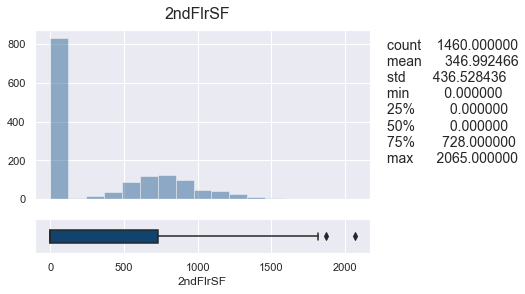

In [17]:
_ = distribution(house_train_num_cleaned["2ndFlrSF"])

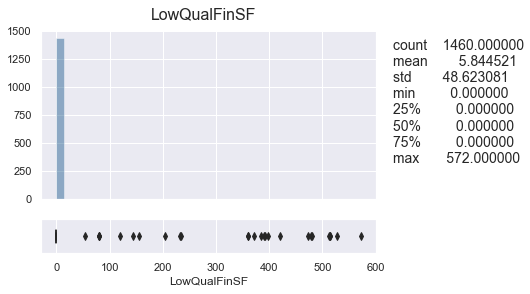

In [18]:
_ = distribution(house_train_num_cleaned["LowQualFinSF"])

Immediately, we notice that a few of the variables have a problem where a large proportion of the values fall into a single value (of 0). Assuming that every 0 value corresponds to a house not having a given 'feature', this is not an unreasonable result, as the wide variety of houses that have been sampled will undoubtedly result in many houses not having specific niche features.

As such, we'll check through each of the numeric variables, and if the percentage of households that don't have the feature is greater than a given threshold, we shall remove that feature.

The threshold chosen will be 30%.

The reasoning behind the removal of these values is that the variance is low enough such that including these values within the model is not worthwhile.

In [19]:
# Script to help remove numeric variables which have at least 30% of observations not having a feature

numeric_remove = []

# Loop through every numeric variable
for i in house_train_num_cleaned.columns:
    if (house_train_num_cleaned[i].value_counts(normalize = True).iloc[0] > 0.3):
        # Add variable to list of variables we should remove
        numeric_remove.append(i)
        
numeric_remove

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [20]:
# Remove the numeric variables listed from the data frame
house_train_num_cleaned = house_train_num_cleaned.drop(numeric_remove, axis = 1)
house_train_num_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1474 to 1489
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotFrontage   1460 non-null   int32
 1   LotArea       1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   YearRemodAdd  1460 non-null   int64
 4   BsmtUnfSF     1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   GrLivArea     1460 non-null   int64
 8   TotRmsAbvGrd  1460 non-null   int64
 9   GarageYrBlt   1460 non-null   int32
 10  GarageArea    1460 non-null   int64
 11  MoSold        1460 non-null   int64
dtypes: int32(2), int64(10)
memory usage: 136.9 KB


In [21]:
house_train_num_cleaned.skew().sort_values(ascending=False)

LotArea         12.207688
LotFrontage      2.409147
TotalBsmtSF      1.524255
1stFlrSF         1.376757
GrLivArea        1.366560
BsmtUnfSF        0.920268
TotRmsAbvGrd     0.676341
MoSold           0.212053
GarageArea       0.179981
YearRemodAdd    -0.503562
YearBuilt       -0.613461
GarageYrBlt     -0.678333
dtype: float64

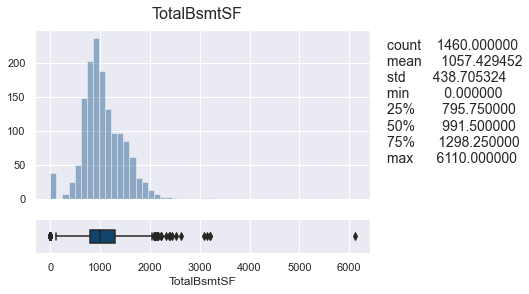

In [22]:
_ = distribution(house_train_num_cleaned["TotalBsmtSF"])

We shall take the variables with a calculated skew value greater than 1 and apply a log (natural log) transformation to  them to help remove the skew. However, 'TotalBsmtSF' still has 30 observations with a 0 value (which makes it unable to be log transformed). To counteract this, we shall simply remove those 30 observations from the data set.

In [23]:
# Obtain index of observations with 0 values for TotalBsmtSF
drop_index = house_train_num_cleaned.loc[house_train_num_cleaned["TotalBsmtSF"] == 0].index.tolist()

# Drop observations
house_train_num_cleaned = house_train_num_cleaned.drop(drop_index)
house_train_cat_cleaned = house_train_cat_cleaned.drop(drop_index)
y_train = y_train.drop(drop_index)

Apply the natural log transformation onto the numeric values with skew greater than 1.

In [24]:
for i in house_train_num_cleaned.columns:
    if (house_train_num_cleaned[i].skew() > 1):
        house_train_num_cleaned[i] = np.log(house_train_num_cleaned[i])
        
house_train_num_cleaned.skew()

LotFrontage    -0.907373
LotArea        -0.144572
YearBuilt      -0.640882
YearRemodAdd   -0.539050
BsmtUnfSF       0.925706
TotalBsmtSF    -0.275816
1stFlrSF        0.140269
GrLivArea       0.033809
TotRmsAbvGrd    0.694028
GarageYrBlt    -0.704264
GarageArea      0.200675
MoSold          0.211049
dtype: float64

## Working with Categorical Variables

Having explored through all the categorical variables (as shown in **III. Explore the data***), we are able to see that there are many variables where the most common category makes up the vast majority of the categories chosen for each house (e.g. Condition2 where the most popoular category has 1445 labels, and 6 labels for the next most popular).

Variables such as this have extremely low variance, and as much may be of worth to remove them from the data set to not speed up the modelling process and help prevent overfitting. 

I will choose 90% of all votes as the threshold value for removal (i.e. if a given category makes up at least 90% of all votes it will be removed)

In [25]:
# Script to help remove categorical variables where the most popular category makes up at least 90% of all options.

# Define new list to store categorical variables
categorical_remove = []

# Loop through every categorical variable
for i in house_train_cat_cleaned.columns:
    if (house_train_cat_cleaned[i].value_counts(normalize = True).iloc[0] > 0.90):
        categorical_remove.append(i)
    
categorical_remove

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'PoolArea']

In [26]:
# Drop the listed variables
house_train_cat_cleaned = house_train_cat_cleaned.drop(categorical_remove, axis=1)
house_train_cat_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 1474 to 1489
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1423 non-null   int64 
 1   MSZoning       1423 non-null   object
 2   LotShape       1423 non-null   object
 3   LandContour    1423 non-null   object
 4   LotConfig      1423 non-null   object
 5   Neighborhood   1423 non-null   object
 6   Condition1     1423 non-null   object
 7   BldgType       1423 non-null   object
 8   HouseStyle     1423 non-null   object
 9   OverallQual    1423 non-null   int64 
 10  OverallCond    1423 non-null   int64 
 11  RoofStyle      1423 non-null   object
 12  Exterior1st    1423 non-null   object
 13  Exterior2nd    1423 non-null   object
 14  MasVnrType     1423 non-null   object
 15  ExterQual      1423 non-null   object
 16  ExterCond      1423 non-null   object
 17  Foundation     1423 non-null   object
 18  BsmtQual       1423 non-n

After assembling all the categorical variables we'll be working with, as with the numeric variables, we'll use imputation to replace all the NA values with the most common value.

In [27]:
# Replace all 'NA' string values with np.NaN
house_train_cat_cleaned = house_train_cat_cleaned.replace("NA", np.NaN)

In [28]:
# Get variables with missing variables
missing_cat = []
for i in house_train_cat_cleaned.columns:
    if (house_train_cat_cleaned[i].isnull().values.any() == True):
        # Append category if missing value exists
        missing_cat.append(i)
        
missing_cat

['MasVnrType',
 'BsmtExposure',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence']

In [29]:
# Script to impute columns with missing values with the column 
for i in missing_cat:
    median = house_train_cat_cleaned[i].value_counts().index[0]
    house_train_cat_cleaned[i] = house_train_cat_cleaned[i].fillna(median)

house_train_cat_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 1474 to 1489
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1423 non-null   int64 
 1   MSZoning       1423 non-null   object
 2   LotShape       1423 non-null   object
 3   LandContour    1423 non-null   object
 4   LotConfig      1423 non-null   object
 5   Neighborhood   1423 non-null   object
 6   Condition1     1423 non-null   object
 7   BldgType       1423 non-null   object
 8   HouseStyle     1423 non-null   object
 9   OverallQual    1423 non-null   int64 
 10  OverallCond    1423 non-null   int64 
 11  RoofStyle      1423 non-null   object
 12  Exterior1st    1423 non-null   object
 13  Exterior2nd    1423 non-null   object
 14  MasVnrType     1423 non-null   object
 15  ExterQual      1423 non-null   object
 16  ExterCond      1423 non-null   object
 17  Foundation     1423 non-null   object
 18  BsmtQual       1423 non-n

Finally, for categorical variables to be best utilised, it is good to convert them into a sparse matrix through one-hot encoding

In [58]:
from sklearn.preprocessing import OneHotEncoder

oneHot = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
house_train_cat_oneHot = oneHot.fit_transform(house_train_cat_cleaned)
house_train_cat_df = pd.DataFrame(house_train_cat_oneHot, columns = oneHot.get_feature_names())
house_train_cat_df


,x0_20,x0_30,x0_40,x0_45,x0_50,x0_60,x0_70,x0_75,x0_80,x0_85,...,x35_0,x35_1,x35_2,x35_3,x35_4,x36_2006,x36_2007,x36_2008,x36_2009,x36_2010
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1420,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Merge Two Dataframes together

In [31]:
# Change the index of the One-hot encoded dataframe to match those in the cleaned dataframes
house_train_cat_df.index = house_train_cat_cleaned.index

# Merge data frames
house_train_cleaned = pd.concat([house_train_num_cleaned, house_train_cat_df], axis = 1)
house_train_cleaned

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,...,x35_0,x35_1,x35_2,x35_3,x35_4,x36_2006,x36_2007,x36_2008,x36_2009,x36_2010
Order,,,,,,,,,,,,,,,,,,,,,
1474,4.174387,9.041922,2003,2003,150,6.752270,6.752270,7.444249,8,2003,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1860,4.382027,9.169518,1976,1976,284,7.140453,7.140453,7.140453,6,1976,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1444,4.219508,9.328123,2001,2002,434,6.824374,6.824374,7.487734,6,2001,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2858,4.094345,9.164296,1915,1970,540,6.628041,6.867974,7.448334,7,1998,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1101,4.430817,9.565214,2000,2000,490,7.043160,7.043160,7.695303,9,2000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,4.127134,8.976768,1999,2000,953,6.859615,6.859615,7.406711,7,1999,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20,4.442651,9.486076,1978,1988,589,7.340836,7.636752,7.636752,7,1978,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,4.189655,9.109636,1941,2006,877,7.049255,7.080026,7.757906,9,1941,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Creating a new Feature

Given how awkward it is working with years as a numeric variable, as well as repeated information between 'YearBuilt' and 'YearRemodAdd' when the houses have not undergone remodelling (i.e. the years listed are the same), it may be more efficient to combine these two features into a single feature which details the amount of years since the last time work has been done on the property. 

In [32]:
# Define new variable LastWorkDone
house_train_cleaned["LastWorkDone"] = 2019 - house_train_cleaned["YearRemodAdd"]
house_train_cleaned["LastWorkDone"]

Order
1474    16
1860    43
1444    17
2858    49
1101    19
        ..
1756    19
20      31
296     13
127     23
1489    54
Name: LastWorkDone, Length: 1423, dtype: int64

In [33]:
# Remove YearBuilt and YearRemodAdd
house_train_cleaned = house_train_cleaned.drop(["YearBuilt", "YearRemodAdd"], axis = 1)
house_train_cleaned

,LotFrontage,LotArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,MoSold,...,x35_1,x35_2,x35_3,x35_4,x36_2006,x36_2007,x36_2008,x36_2009,x36_2010,LastWorkDone
Order,,,,,,,,,,,,,,,,,,,,,
1474,4.174387,9.041922,150,6.752270,6.752270,7.444249,8,2003,548,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16
1860,4.382027,9.169518,284,7.140453,7.140453,7.140453,6,1976,460,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43
1444,4.219508,9.328123,434,6.824374,6.824374,7.487734,6,2001,608,9,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17
2858,4.094345,9.164296,540,6.628041,6.867974,7.448334,7,1998,642,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,49
1101,4.430817,9.565214,490,7.043160,7.043160,7.695303,9,2000,836,12,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,4.127134,8.976768,953,6.859615,6.859615,7.406711,7,1999,460,8,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19
20,4.442651,9.486076,589,7.340836,7.636752,7.636752,7,1978,500,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31
296,4.189655,9.109636,877,7.049255,7.080026,7.757906,9,1941,252,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13


# Model Fitting

The three models we will be fitting are:
* Random Forest
* Gradient Boosting
* Linear Regression with Elastic Net Regularisation

In [34]:
# Import mean squared error calculation function
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForestRegressor using default parameters
forestRegressor = RandomForestRegressor()

# Use 10-fold Cross Validation to make out-of-sample prediction using training data set
ranForestPredict = cross_val_predict(forestRegressor, house_train_cleaned, y_train, cv = 10)

# Determine error for out-of-sample prediction
np.sqrt(mean_squared_error(y_train, ranForestPredict))

31473.78984096976

In [36]:
# Use grid search to find best parameters
forestReg = RandomForestRegressor()

forestParameters = [{'n_estimators': [50, 100, 150], 'max_features': [5, 10, 15, 20]}]
gridSearch_forest = GridSearchCV(forestReg, forestParameters, cv = 10, scoring = 'neg_mean_squared_error')

gridSearch_forest.fit(house_train_cleaned, y_train)

# Get best parameters from Grid Search
gridSearch_forest.best_params_

{'max_features': 20, 'n_estimators': 100}

In [37]:
# Test these best parameters
forestReg = RandomForestRegressor(max_features = 20, n_estimators = 100)
ranForestPredict = cross_val_predict(forestReg, house_train_cleaned, y_train, cv = 10)
np.sqrt(mean_squared_error(y_train, ranForestPredict))

30468.41940472692

From above, we see that the best parameters perform slightly better than the default parameters, and so assuming we use RandomForestRegressor, we'll be using the n_estimators as 100 and max_features as 20.

## Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate GradientBoostingRegressor with default parameters
gradBoostReg = GradientBoostingRegressor()

# Make out-of-sample prediction
gradBoostPred = cross_val_predict(gradBoostReg, house_train_cleaned, y_train, cv = 10)

# Determine out-of-sample error
np.sqrt(mean_squared_error(y_train, gradBoostPred))

28657.929629462564

In [39]:
# Use grid search to find best parameters
gradReg = GradientBoostingRegressor()

gradParameters = [{'n_estimators': [50, 100, 150], 'max_depth': [3, 6, 9]}]
gridSearch_grad = GridSearchCV(gradReg, gradParameters, cv = 10, scoring = 'neg_mean_squared_error')

gridSearch_grad.fit(house_train_cleaned, y_train)

gridSearch_grad.best_params_

{'max_depth': 3, 'n_estimators': 150}

In [40]:
# Test how the optimal parameters from the grid search compares to the default
gradBoost = GradientBoostingRegressor(max_depth = 3, n_estimators = 150)
gradBoostPred = cross_val_predict(gradBoost, house_train_cleaned, y_train, cv = 10)

np.sqrt(mean_squared_error(y_train, gradBoostPred))

27971.21885772602

There is a slight performance increase, and so we shall be using the aforementioned parameters when fitting the testing data set.

## Linear Regression with Elastic Net Regularisation

In [41]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

# Instantiate ElasticNet using default parameters
eNet = ElasticNet()
eNet_predict = cross_val_predict(eNet, house_train_cleaned, y_train, cv = 10)

np.sqrt(mean_squared_error(y_train, eNet_predict))

39127.69768850279

In [42]:
# Use ElasticNetCV to find best alpha parameter

# Instantiate ElasticNetCV using a range of alpha values
eNetCV = ElasticNetCV(l1_ratio = [0.2, 0.4, 0.6, 0.8, 1], cv = 10)
eNetCV.fit(house_train_cleaned, y_train)

eNetCVPred = eNetCV.predict(house_train_cleaned)

np.sqrt(mean_squared_error(y_train, eNetCVPred))

51468.15059390375

As shown by the drastic difference in errors, we shall be sticking with the default parameters.

# Fitting best model onto testing data

From the 3 tested models, we've found that the gradient boosting models achieves the best results.
As such we will be fitting it onto our testing data.

However before we do that, it is essential that we apply all transformations from our training data set to our testing.

In [43]:
house_test_cat = house_test[categorical]
house_test_num = house_test.drop(categorical, axis = 1)

In [44]:
house_test_num_cleaned = house_test_num.copy()
house_test_cat_cleaned = house_test_cat.copy()

In [45]:
house_test_num_cleaned = house_test_num_cleaned.replace("NA", np.NaN)
missing_num = []
for i in house_test_num_cleaned.columns:
    if (house_test_num_cleaned[i].isnull().values.any() == True):
        # Append category if missing value exists
        missing_num.append(i)
        
for i in missing_num:
    median = house_test_num_cleaned[i].median()
    house_test_num_cleaned[i] = house_test_num_cleaned[i].fillna(median).astype(int)

In [46]:
house_test_num_cleaned = house_test_num_cleaned.drop(numeric_remove, axis = 1)

In [47]:
for i in house_test_num_cleaned.columns:
    if (house_test_num_cleaned[i].skew() > 1):
        house_test_num_cleaned[i] = np.log(house_test_num_cleaned[i])
        
house_test_num_cleaned.skew()

LotFrontage     0.755192
LotArea        -0.916037
YearBuilt      -0.587657
YearRemodAdd   -0.399906
BsmtUnfSF       0.920624
TotalBsmtSF     0.814122
1stFlrSF        0.052527
GrLivArea       0.027624
TotRmsAbvGrd    0.842597
GarageYrBlt    -0.170714
GarageArea      0.300273
MoSold          0.183022
dtype: float64

In [48]:
# Script to help remove categorical variables where the most popular category makes up at least 90% of all options.
house_test_cat_cleaned = house_test_cat_cleaned.drop(categorical_remove, axis=1)
house_test_cat_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   int64 
 1   MSZoning       1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   LotConfig      1459 non-null   object
 5   Neighborhood   1459 non-null   object
 6   Condition1     1459 non-null   object
 7   BldgType       1459 non-null   object
 8   HouseStyle     1459 non-null   object
 9   OverallQual    1459 non-null   int64 
 10  OverallCond    1459 non-null   int64 
 11  RoofStyle      1459 non-null   object
 12  Exterior1st    1459 non-null   object
 13  Exterior2nd    1459 non-null   object
 14  MasVnrType     1459 non-null   object
 15  ExterQual      1459 non-null   object
 16  ExterCond      1459 non-null   object
 17  Foundation     1459 non-null   object
 18  BsmtQual       1459 non-n

In [49]:
# Replace all 'NA' string values with np.NaN
house_test_cat_cleaned = house_test_cat_cleaned.replace("NA", np.NaN)

missing_cat = []
for i in house_test_cat_cleaned.columns:
    if (house_test_cat_cleaned[i].isnull().values.any() == True):
        # Append category if missing value exists
        missing_cat.append(i)

# Script to impute columns with missing values with the column 
for i in missing_cat:
    median = house_test_cat_cleaned[i].value_counts().index[0]
    house_test_cat_cleaned[i] = house_test_cat_cleaned[i].fillna(median)

In [62]:
house_test_cat_oneHot = oneHot.transform(house_test_cat_cleaned)
house_test_cat_df = pd.DataFrame(house_test_cat_oneHot, columns = oneHot.get_feature_names())
house_test_cat_df

,x0_20,x0_30,x0_40,x0_45,x0_50,x0_60,x0_70,x0_75,x0_80,x0_85,...,x35_0,x35_1,x35_2,x35_3,x35_4,x36_2006,x36_2007,x36_2008,x36_2009,x36_2010
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
house_test_cat_df.index = house_test_cat_cleaned.index

# Merge data frames
house_test_cleaned = pd.concat([house_test_num_cleaned, house_test_cat_df], axis = 1)
house_test_cleaned

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,...,x35_0,x35_1,x35_2,x35_3,x35_4,x36_2006,x36_2007,x36_2008,x36_2009,x36_2010
Id,,,,,,,,,,,,,,,,,,,,,
1461,80,9.360655,1961,1961,270,882,6.797940,6.797940,5,1961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1462,81,9.565704,1958,1958,406,1329,7.192182,7.192182,6,1958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1463,74,9.534595,1997,1998,137,928,6.833032,7.395722,6,1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1464,78,9.208138,1998,1998,324,926,6.830874,7.380256,7,1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1465,43,8.518193,1992,1992,1017,1280,7.154615,7.154615,5,1992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21,7.568379,1970,1970,546,546,6.302619,6.995766,5,1979,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,21,7.546446,1970,1970,294,546,6.302619,6.995766,6,1970,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,160,9.903488,1960,1996,0,1224,7.109879,7.109879,7,1960,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
house_test_cleaned["LastWorkDone"] = 2019 - house_test_cleaned["YearRemodAdd"]
house_test_cleaned = house_test_cleaned.drop(["YearBuilt", "YearRemodAdd"], axis = 1)

In [65]:
gradBoost.fit(house_train_cleaned, y_train)

GradientBoostingRegressor(n_estimators=150)

In [66]:
gradBoostTest = gradBoost.predict(house_test_cleaned)

In [98]:
predictions = pd.Series(gradBoostTest, house_test_cleaned.index)
predictions

Id
1461    156906.732589
1462    185105.810932
1463    237301.573242
1464    221634.754650
1465    221069.839464
            ...      
2915    139389.818808
2916    147233.228282
2917    196716.195315
2918    153921.898994
2919    255174.324815
Length: 1459, dtype: float64

In [74]:
predictions.to_csv('predictions.csv')

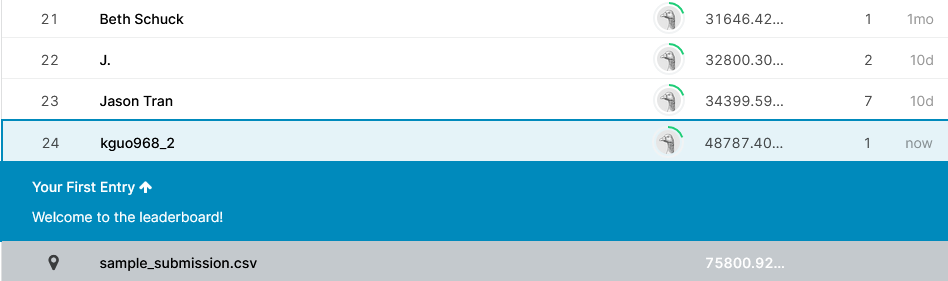

In [99]:
from IPython.display import Image
Image(filename='KagglePosition.png')